In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import finoptions as fo
import warnings
warnings.filterwarnings('ignore')
import itertools
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})


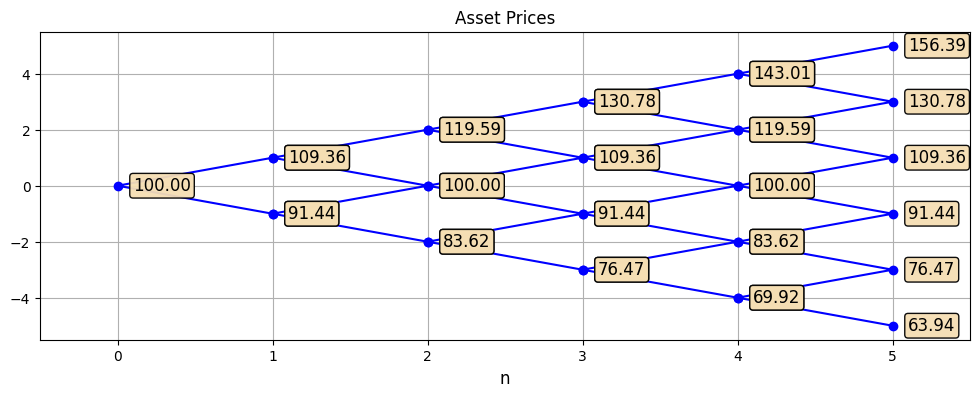

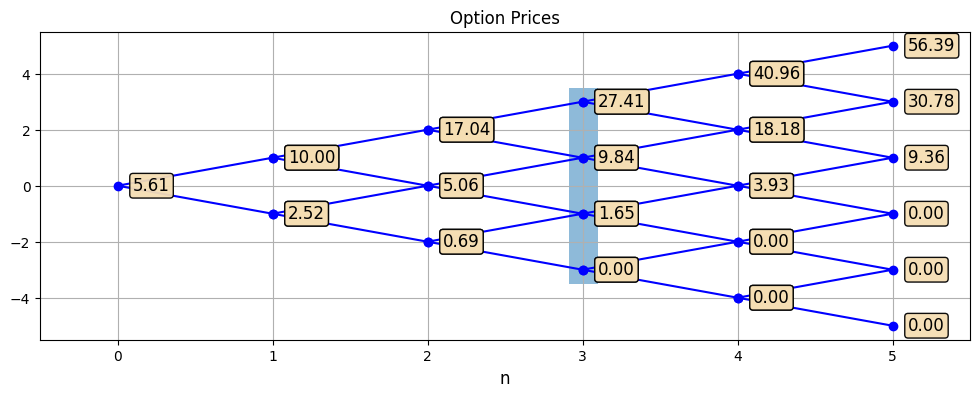

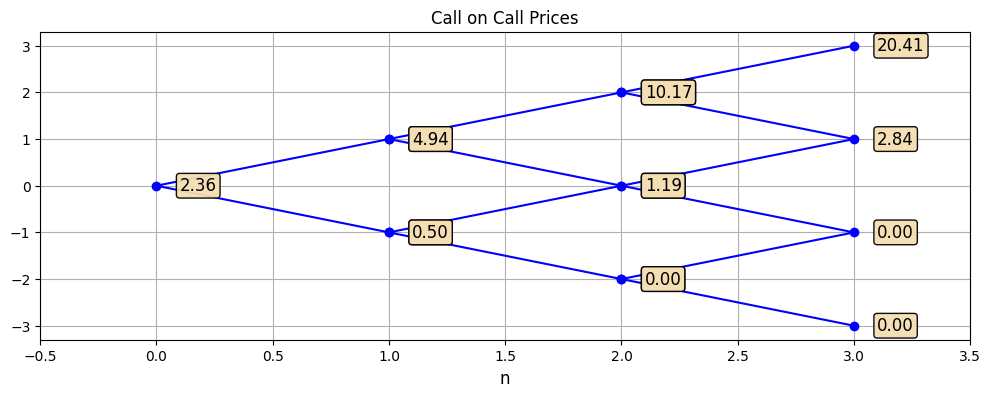

In [239]:
import numpy as np
import matplotlib.pyplot as plt

class BiTreePlotter:
    def __init__(self, tree):
        self._tree = tree

    def plot(self, dx=-0.025, dy=0.4, size=12, digits=2, title='', shade_step=None, **kwargs):
        depth = self._tree.shape[1] - 1
        
        fig = plt.figure(figsize=(12,4), **kwargs)
        for i in range(depth):
            x = [1, 0, 1]
            for j in range(i):
                x.append(0)
                x.append(1)
            x = np.array(x) + i
            y = np.arange(-(i + 1), i + 2)[::-1]
            plt.plot(x, y, "bo-")

            pts = list(zip(x, y))

            for p in pts:
                value = round(self._tree[self._convert_to_index(p)][p[0]], digits)
                # plt.annotate(value, xy=p, xytext=(p[0] + dx, p[1] + dy), fontsize=size)
                plt.annotate(f'{value:.2f}', 
                                xy=p, 
                              xytext=(p[0] + 0.1, p[1] + 0), ha='left', va='center',
                              fontsize=size,
                              bbox=dict(boxstyle='round, pad=0.2', 
                              edgecolor='black', facecolor='wheat', alpha=0.95))
        if shade_step:
            s = np.arange(0,depth+1, 0.01)
            where = (s <= shade_step + 0.1) & (s > shade_step - 0.1)
            plt.fill_between(s, -(shade_step+0.5), (shade_step+0.5), where=where, alpha=0.5)
        plt.xlabel("n", fontsize=size)
        plt.xlim((-0.5, depth+0.5))
        # plt.ylabel("Option Value", fontsize=size)
        plt.title(title)
        plt.grid()
        
        return fig

    def _convert_to_index(self, p):
        # converts tree y values into indices for the tree matrix
        step = -2
        max = p[0]
        if max > 0:
            a = np.arange(max, -max + step, step)
            return int(np.where(a == p[1])[0])
        else:
            return 0

def binomial_tree_asset_prices(S, T, r, sigma, n):
    up = np.exp(sigma*np.sqrt(T/n))
    down = np.exp(-sigma*np.sqrt(T/n))

    # Initialize the asset prices at each node
    asset_prices = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            asset_prices[j, i] = S * (up ** (i - j)) * (down ** j)

    return asset_prices

S = 100
K = 100
T = 12/12
r = 0.1
d = 0.15 # dividend yield
sigma = 0.2
n = 5
type='european'

R = (1+r)**(T/n)
D = (1+d)**(T/n)

q = (R/D-down)/(up-down)

asset_prices = binomial_tree_asset_prices(S, T, r, sigma, n)
_ = BiTreePlotter(asset_prices).plot(title='Asset Prices')


options = np.clip(asset_prices-K, 0, np.inf)
for i in np.arange(len(options)-2, -1, -1):
    prices_node = options[::,i+1]
    option_prices = options[::,i][:i+1]
    for idx, node_opt in enumerate(option_prices):
        vup, vdown =  prices_node[idx:idx+2]
        v = (1/R)*(q*vup+(1-q)*vdown)
        options[idx, i] = v

_ = BiTreePlotter(options).plot(title='Option Prices', shade_step=3)


T = 3
call_on_call = np.clip(options-7, 0, np.inf)[:,:T+1][:T+1]
for i in np.arange(len(call_on_call)-2, -1, -1):
    prices_node = call_on_call[::,i+1]
    option_prices = call_on_call[::,i][:i+1]
    for idx, node_opt in enumerate(option_prices):
        vup, vdown =  prices_node[idx:idx+2]
        v = (1/R)*(q*vup+(1-q)*vdown)
        call_on_call[idx, i] = v

_ = BiTreePlotter(call_on_call).plot(title='Call on Call Prices')

In [ ]:
def trinomial_tree():
    up = np.exp(sigma*np.sqrt(T/n))
    down = np.exp(-sigma*np.sqrt(T/n))
    middle = 0.66
    # Initialize the asset prices at each node
    asset_prices = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            asset_prices[j, i] = S * (up ** (i - j)) * (down ** j)

    return asset_prices